MSE (Mean Filter): 111.39
MSE (Median Filter): 107.57
MSE (Gaussian Filter): 112.64


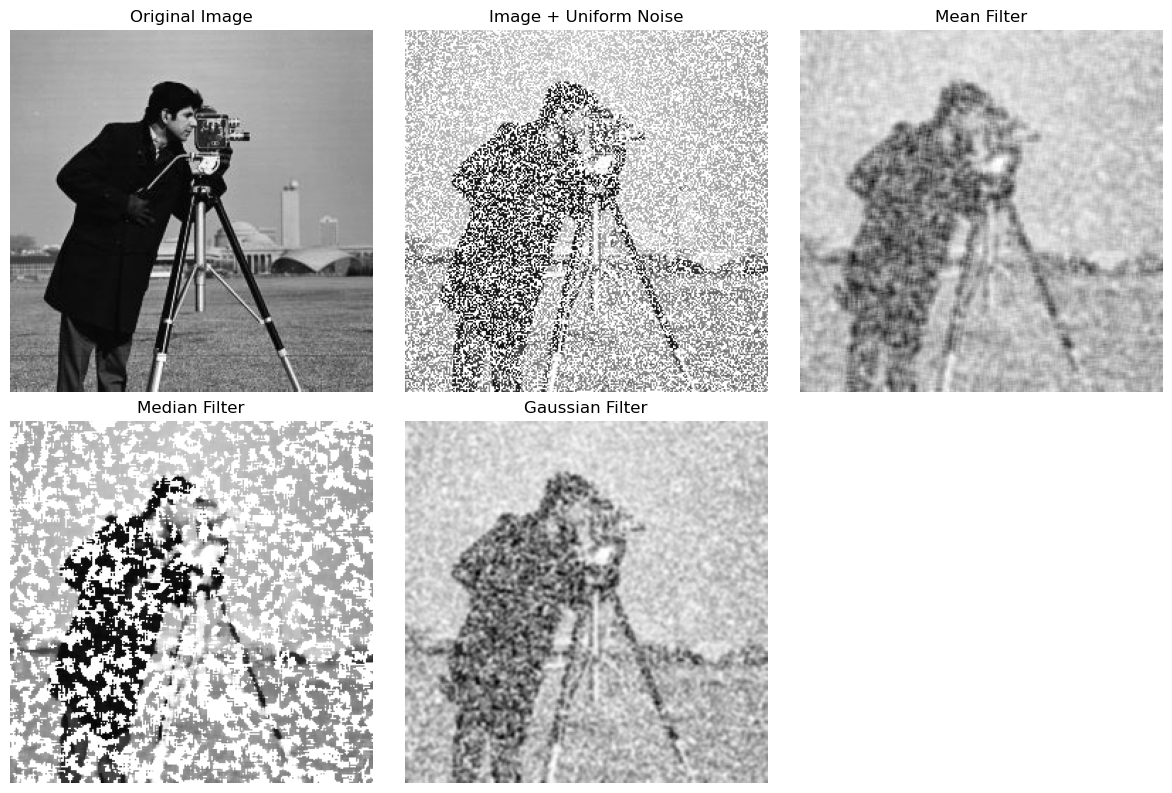

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('cameraman.jpg', 0)
M, N = img.shape

uni_noise = np.random.uniform(-20, 20, (M, N)).astype(np.uint8)
combined_uniform = cv2.add(img, uni_noise)

mean_filtered = cv2.blur(combined_uniform, (5, 5))
median_filtered = cv2.medianBlur(combined_uniform, 5)
gaussian_filtered = cv2.GaussianBlur(combined_uniform, (5, 5), 0)

def mse(imageA, imageB):
    return np.mean((imageA - imageB) ** 2)

mse_mean = mse(img, mean_filtered)
mse_median = mse(img, median_filtered)
mse_gaussian = mse(img, gaussian_filtered)

print(f'MSE (Mean Filter): {mse_mean:.2f}')
print(f'MSE (Median Filter): {mse_median:.2f}')
print(f'MSE (Gaussian Filter): {mse_gaussian:.2f}')

plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis("off")

plt.subplot(2, 3, 2)
plt.imshow(combined_uniform, cmap='gray')
plt.title('Image + Uniform Noise')
plt.axis("off")

plt.subplot(2, 3, 3)
plt.imshow(mean_filtered, cmap='gray')
plt.title('Mean Filter')
plt.axis("off")

plt.subplot(2, 3, 4)
plt.imshow(median_filtered, cmap='gray')
plt.title('Median Filter')
plt.axis("off")

plt.subplot(2, 3, 5)
plt.imshow(gaussian_filtered, cmap='gray')
plt.title('Gaussian Filter')
plt.axis("off")

plt.tight_layout()
plt.show()


MSE (Mean Filter): 73.23
MSE (Median Filter): 30.65
MSE (Gaussian Filter): 70.13


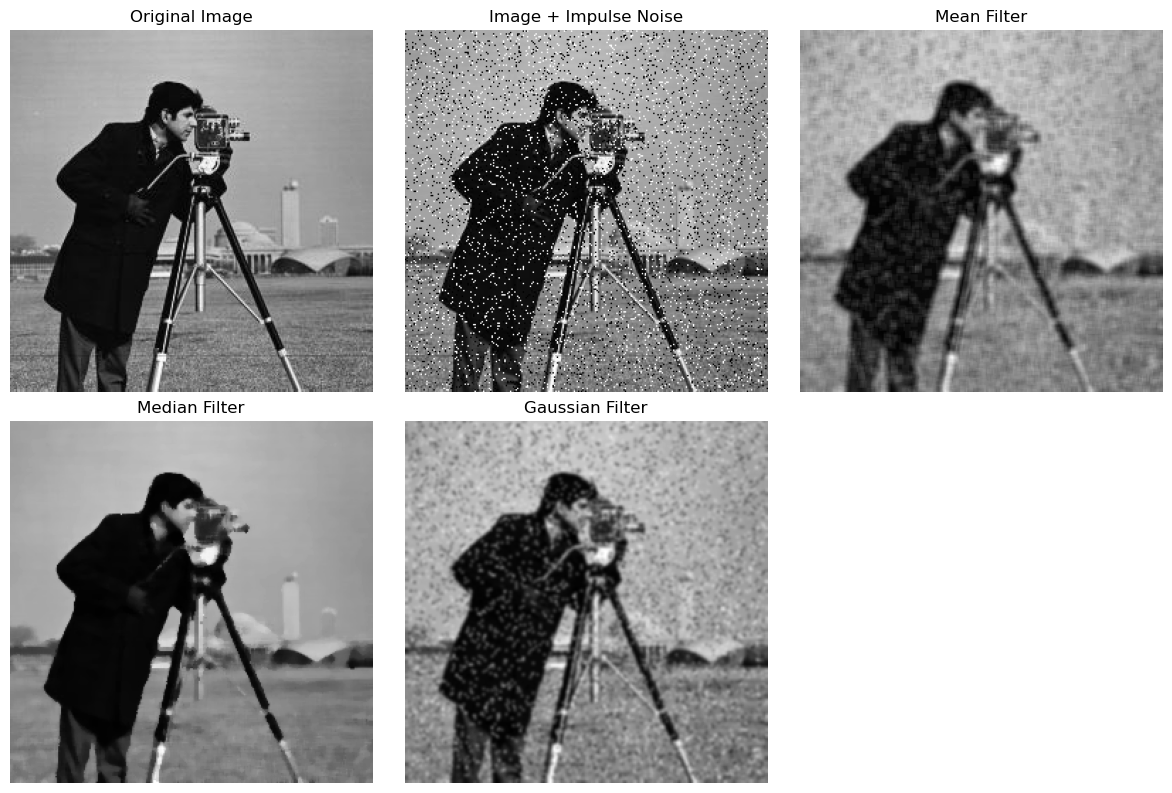

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('cameraman.jpg', 0)
M, N = img.shape

def add_impulse_noise(image, prob):
    noisy_image = image.copy()
    noise = np.random.rand(M, N)
    noisy_image[noise < prob] = 0
    noisy_image[noise > 1 - prob] = 255
    return noisy_image

impulse_noise_prob = 0.05
combined_impulse = add_impulse_noise(img, impulse_noise_prob)

mean_filtered = cv2.blur(combined_impulse, (5, 5))
median_filtered = cv2.medianBlur(combined_impulse, 5)
gaussian_filtered = cv2.GaussianBlur(combined_impulse, (5, 5), 0)

def mse(imageA, imageB):
    return np.mean((imageA - imageB) ** 2)

mse_mean = mse(img, mean_filtered)
mse_median = mse(img, median_filtered)
mse_gaussian = mse(img, gaussian_filtered)

print(f'MSE (Mean Filter): {mse_mean:.2f}')
print(f'MSE (Median Filter): {mse_median:.2f}')
print(f'MSE (Gaussian Filter): {mse_gaussian:.2f}')

plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis("off")

plt.subplot(2, 3, 2)
plt.imshow(combined_impulse, cmap='gray')
plt.title('Image + Impulse Noise')
plt.axis("off")

plt.subplot(2, 3, 3)
plt.imshow(mean_filtered, cmap='gray')
plt.title('Mean Filter')
plt.axis("off")

plt.subplot(2, 3, 4)
plt.imshow(median_filtered, cmap='gray')
plt.title('Median Filter')
plt.axis("off")

plt.subplot(2, 3, 5)
plt.imshow(gaussian_filtered, cmap='gray')
plt.title('Gaussian Filter')
plt.axis("off")

plt.tight_layout()
plt.show()


In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

combined = cv2.imread('combined_gaussian_noise.png', 0)

if combined is None:
    print("Error: Image not found.")
    exit()

original = cv2.imread('cameraman.jpg', 0)

mean_filtered = cv2.blur(combined, (5, 5))
median_filtered = cv2.medianBlur(combined, 5)
gaussian_filtered = cv2.GaussianBlur(combined, (5, 5), 0)

def mse(imageA, imageB):
    return np.mean((imageA - imageB) ** 2)

mse_mean = mse(original, mean_filtered)
mse_median = mse(original, median_filtered)
mse_gaussian = mse(original, gaussian_filtered)

print(f'MSE (Mean Filter): {mse_mean:.2f}')
print(f'MSE (Median Filter): {mse_median:.2f}')
print(f'MSE (Gaussian Filter): {mse_gaussian:.2f}')

plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.imshow(original, cmap='gray')
plt.title('Original Image')
plt.axis("off")

plt.subplot(2, 3, 2)
plt.imshow(combined, cmap='gray')
plt.title('Image + Gaussian Noise')
plt.axis("off")

plt.subplot(2, 3, 3)
plt.imshow(mean_filtered, cmap='gray')
plt.title('Mean Filter')
plt.axis("off")

plt.subplot(2, 3, 4)
plt.imshow(median_filtered, cmap='gray')
plt.title('Median Filter')
plt.axis("off")

plt.subplot(2, 3, 5)
plt.imshow(gaussian_filtered, cmap='gray')
plt.title('Gaussian Filter')
plt.axis("off")

plt.tight_layout()
plt.show()


Error: Image not found.


error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\box_filter.dispatch.cpp:446: error: (-215:Assertion failed) !_src.empty() in function 'cv::boxFilter'


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

combined = cv2.imread('combined_gaussian_noise.png', 0)
original = cv2.imread('cameraman.jpg', 0)

if combined is None or original is None:
    print("Error: One of the images not found.")
    exit()

def mse(imageA, imageB):
    return np.mean((imageA - imageB) ** 2)

def ideal_filter(shape, cutoff):
    rows, cols = shape
    crow, ccol = rows // 2, cols // 2
    x, y = np.ogrid[:rows, :cols]
    mask = (np.sqrt((x - crow) ** 2 + (y - ccol) ** 2) <= cutoff).astype(float)
    return mask

def butterworth_filter(shape, cutoff, order=2):
    rows, cols = shape
    crow, ccol = rows // 2, cols // 2
    x, y = np.ogrid[:rows, :cols]
    distance = np.sqrt((x - crow) ** 2 + (y - ccol) ** 2)
    mask = 1 / (1 + (distance / cutoff) ** (2 * order))
    return mask

def gaussian_filter(shape, cutoff):
    rows, cols = shape
    crow, ccol = rows // 2, cols // 2
    x, y = np.ogrid[:rows, :cols]
    distance = np.sqrt((x - crow) ** 2 + (y - ccol) ** 2)
    mask = np.exp(-(distance ** 2) / (2 * (cutoff ** 2)))
    return mask

def filter_image_frequency(image, filter_type, cutoff, order=2):
    dft = np.fft.fft2(image)
    dft_shift = np.fft.fftshift(dft)

    if filter_type == 'ideal':
        mask = ideal_filter(image.shape, cutoff)
    elif filter_type == 'butterworth':
        mask = butterworth_filter(image.shape, cutoff, order)
    elif filter_type == 'gaussian':
        mask = gaussian_filter(image.shape, cutoff)
    else:
        raise ValueError("Unknown filter type")

    filtered_dft = dft_shift * mask
    idft_shift = np.fft.ifftshift(filtered_dft)
    filtered_image = np.fft.ifft2(idft_shift)
    filtered_image = np.abs(filtered_image)

    return filtered_image

cutoff_frequency = 50

ideal_filtered = filter_image_frequency(combined, 'ideal', cutoff_frequency)
butterworth_filtered = filter_image_frequency(combined, 'butterworth', cutoff_frequency)
gaussian_filtered = filter_image_frequency(combined, 'gaussian', cutoff_frequency)

mse_ideal = mse(original, ideal_filtered)
mse_butterworth = mse(original, butterworth_filtered)
mse_gaussian = mse(original, gaussian_filtered)

print(f'MSE (Ideal Filter): {mse_ideal:.2f}')
print(f'MSE (Butterworth Filter): {mse_butterworth:.2f}')
print(f'MSE (Gaussian Filter): {mse_gaussian:.2f}')

plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.imshow(original, cmap='gray')
plt.title('Original Image')
plt.axis("off")
plt.subplot(2, 3, 2)
plt.imshow(combined, cmap='gray')
plt.title('Image + Gaussian Noise')
plt.axis("off")
plt.subplot(2, 3, 3)
plt.imshow(ideal_filtered, cmap='gray')
plt.title('Ideal Filter')
plt.axis("off")
plt.subplot(2, 3, 4)
plt.imshow(butterworth_filtered, cmap='gray')
plt.title('Butterworth Filter')
plt.axis("off")
plt.subplot(2, 3, 5)
plt.imshow(gaussian_filtered, cmap='gray')
plt.title('Gaussian Filter')
plt.axis("off")

plt.tight_layout()
plt.show()


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('cameraman.jpg', 0)
M, N = img.shape

def add_impulse_noise(image, prob):
    noisy_image = image.copy()
    noise = np.random.rand(M, N)
    noisy_image[noise < prob] = 0
    noisy_image[noise > 1 - prob] = 255
    return noisy_image

impulse_noise_prob = 0.05
combined_impulse = add_impulse_noise(img, impulse_noise_prob)

def mse(imageA, imageB):
    return np.mean((imageA - imageB) ** 2)

def ideal_filter(shape, cutoff):
    rows, cols = shape
    crow, ccol = rows // 2, cols // 2
    x, y = np.ogrid[:rows, :cols]
    mask = (np.sqrt((x - crow) ** 2 + (y - ccol) ** 2) <= cutoff).astype(float)
    return mask

def butterworth_filter(shape, cutoff, order=2):
    rows, cols = shape
    crow, ccol = rows // 2, cols // 2
    x, y = np.ogrid[:rows, :cols]
    distance = np.sqrt((x - crow) ** 2 + (y - ccol) ** 2)
    mask = 1 / (1 + (distance / cutoff) ** (2 * order))
    return mask

def gaussian_filter(shape, cutoff):
    rows, cols = shape
    crow, ccol = rows // 2, cols // 2
    x, y = np.ogrid[:rows, :cols]
    distance = np.sqrt((x - crow) ** 2 + (y - ccol) ** 2)
    mask = np.exp(-(distance ** 2) / (2 * (cutoff ** 2)))
    return mask

def filter_image_frequency(image, filter_type, cutoff, order=2):
    dft = np.fft.fft2(image)
    dft_shift = np.fft.fftshift(dft)

    if filter_type == 'ideal':
        mask = ideal_filter(image.shape, cutoff)
    elif filter_type == 'butterworth':
        mask = butterworth_filter(image.shape, cutoff, order)
    elif filter_type == 'gaussian':
        mask = gaussian_filter(image.shape, cutoff)
    else:
        raise ValueError("Unknown filter type")

    filtered_dft = dft_shift * mask
    idft_shift = np.fft.ifftshift(filtered_dft)
    filtered_image = np.fft.ifft2(idft_shift)
    return np.abs(filtered_image)

cutoff_frequency = 50

ideal_filtered = filter_image_frequency(combined_impulse, 'ideal', cutoff_frequency)
butterworth_filtered = filter_image_frequency(combined_impulse, 'butterworth', cutoff_frequency)
gaussian_filtered = filter_image_frequency(combined_impulse, 'gaussian', cutoff_frequency)

mse_ideal = mse(img, ideal_filtered)
mse_butterworth = mse(img, butterworth_filtered)
mse_gaussian = mse(img, gaussian_filtered)

print(f'MSE (Ideal Filter): {mse_ideal:.2f}')
print(f'MSE (Butterworth Filter): {mse_butterworth:.2f}')
print(f'MSE (Gaussian Filter): {mse_gaussian:.2f}')

plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis("off")

plt.subplot(2, 3, 2)
plt.imshow(combined_impulse, cmap='gray')
plt.title('Image + Impulse Noise')
plt.axis("off")

plt.subplot(2, 3, 3)
plt.imshow(ideal_filtered, cmap='gray')
plt.title('Ideal Filter')
plt.axis("off")

plt.subplot(2, 3, 4)
plt.imshow(butterworth_filtered, cmap='gray')
plt.title('Butterworth Filter')
plt.axis("off")

plt.subplot(2, 3, 5)
plt.imshow(gaussian_filtered, cmap='gray')
plt.title('Gaussian Filter')
plt.axis("off")

plt.tight_layout()
plt.show()


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('cameraman.jpg', 0)
M, N = img.shape

uni_noise = np.random.uniform(-20, 20, (M, N)).astype(np.uint8)
combined_uniform = cv2.add(img, uni_noise)

def mse(imageA, imageB):
    return np.mean((imageA - imageB) ** 2)

def ideal_filter(shape, cutoff):
    rows, cols = shape
    crow, ccol = rows // 2, cols // 2
    x, y = np.ogrid[:rows, :cols]
    mask = (np.sqrt((x - crow) ** 2 + (y - ccol) ** 2) <= cutoff).astype(float)
    return mask

def butterworth_filter(shape, cutoff, order=2):
    rows, cols = shape
    crow, ccol = rows // 2, cols // 2
    x, y = np.ogrid[:rows, :cols]
    distance = np.sqrt((x - crow) ** 2 + (y - ccol) ** 2)
    mask = 1 / (1 + (distance / cutoff) ** (2 * order))
    return mask

def gaussian_filter(shape, cutoff):
    rows, cols = shape
    crow, ccol = rows // 2, cols // 2
    x, y = np.ogrid[:rows, :cols]
    distance = np.sqrt((x - crow) ** 2 + (y - ccol) ** 2)
    mask = np.exp(-(distance ** 2) / (2 * (cutoff ** 2)))
    return mask

def filter_image_frequency(image, filter_type, cutoff, order=2):
    dft = np.fft.fft2(image)
    dft_shift = np.fft.fftshift(dft)

    if filter_type == 'ideal':
        mask = ideal_filter(image.shape, cutoff)
    elif filter_type == 'butterworth':
        mask = butterworth_filter(image.shape, cutoff, order)
    elif filter_type == 'gaussian':
        mask = gaussian_filter(image.shape, cutoff)
    else:
        raise ValueError("Unknown filter type")

    filtered_dft = dft_shift * mask
    idft_shift = np.fft.ifftshift(filtered_dft)
    filtered_image = np.fft.ifft2(idft_shift)
    return np.abs(filtered_image)

cutoff_frequency = 50

ideal_filtered = filter_image_frequency(combined_uniform, 'ideal', cutoff_frequency)
butterworth_filtered = filter_image_frequency(combined_uniform, 'butterworth', cutoff_frequency)
gaussian_filtered = filter_image_frequency(combined_uniform, 'gaussian', cutoff_frequency)

mse_ideal = mse(img, ideal_filtered)
mse_butterworth = mse(img, butterworth_filtered)
mse_gaussian = mse(img, gaussian_filtered)

print(f'MSE (Ideal Filter): {mse_ideal:.2f}')
print(f'MSE (Butterworth Filter): {mse_butterworth:.2f}')
print(f'MSE (Gaussian Filter): {mse_gaussian:.2f}')

plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis("off")

plt.subplot(2, 3, 2)
plt.imshow(combined_uniform, cmap='gray')
plt.title('Image + Uniform Noise')
plt.axis("off")

plt.subplot(2, 3, 3)
plt.imshow(ideal_filtered, cmap='gray')
plt.title('Ideal Filtered')
plt.axis("off")

plt.subplot(2, 3, 4)
plt.imshow(butterworth_filtered, cmap='gray')
plt.title('Butterworth Filtered')
plt.axis("off")

plt.subplot(2, 3, 5)
plt.imshow(gaussian_filtered, cmap='gray')
plt.title('Gaussian Filtered')
plt.axis("off")

plt.tight_layout()
plt.show()


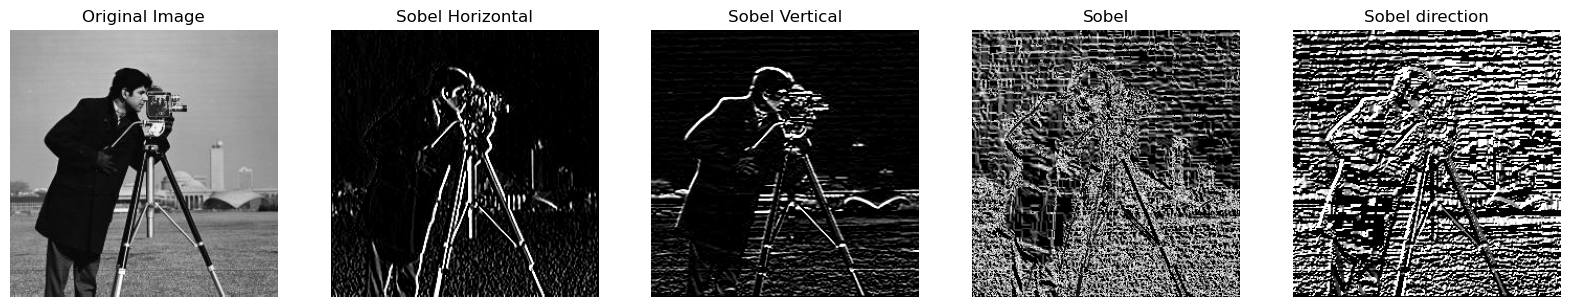

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

img=cv2.imread('cameraman.jpg',0)

#Sobel
sobelx= np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
sobely = np.rot90(sobelx)
#convoling the image using 3x3 kernal.Sobel horizontal and vertical to the input image to the image using the above kernal
sobelx_con = cv2.filter2D(img, -1, sobelx)
sobely_con = cv2.filter2D(img, -1, sobely)
magnitude_sobel = np.sqrt(np.square(sobelx_con) + np.square(sobely_con))
gradient_direction_sobel = np.arctan2(sobely_con, sobelx_con)

plt.figure(figsize=(20, 10))
plt.subplot(1,5,1)
plt.title('Original Image')
plt.imshow(img,cmap='gray')
plt.axis('off')
plt.subplot(1,5,2)
plt.title('Sobel Horizontal')
plt.imshow(sobelx_con,cmap='gray')
plt.axis('off')
plt.subplot(1,5,3)
plt.title('Sobel Vertical')
plt.imshow(sobely_con,cmap='gray')
plt.axis('off')
plt.subplot(1,5,4)
plt.title('Sobel')
plt.imshow(magnitude_sobel,cmap='gray')
plt.axis('off')
plt.subplot(1,5,5)
plt.title('Sobel direction')
plt.imshow(gradient_direction_sobel,cmap='gray')
plt.axis('off')
plt.show()

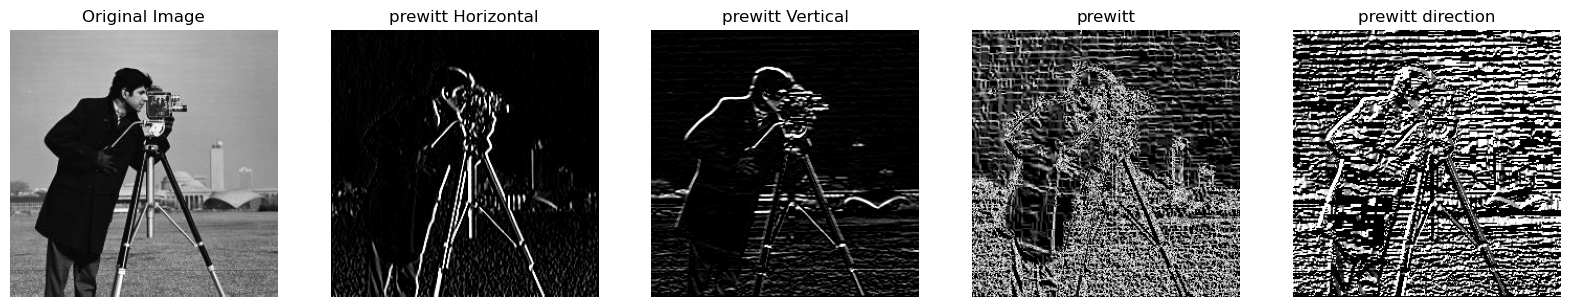

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

img=cv2.imread('cameraman.jpg',0)

#PREWITT
prewittx= np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
prewitty = np.rot90(prewittx)
#convoling the image using 3x3 kernal.prewitt horizontal and verticle to the input image to the image using the above kernal
prewittx_con = cv2.filter2D(img, -1, prewittx)
prewitty_con = cv2.filter2D(img, -1, prewitty)
magnitude_prewitt = np.sqrt(np.square(prewittx_con) + np.square(prewitty_con))
gradient_direction_prewitt = np.arctan2(prewitty_con, prewittx_con)

plt.figure(figsize=(20, 10))
plt.subplot(1,5,1)
plt.title('Original Image')
plt.imshow(img,cmap='gray')
plt.axis('off')
plt.subplot(1,5,2)
plt.title('prewitt Horizontal')
plt.imshow(prewittx_con,cmap='gray')
plt.axis('off')
plt.subplot(1,5,3)
plt.title('prewitt Vertical')
plt.imshow(prewitty_con,cmap='gray')
plt.axis('off')
plt.subplot(1,5,4)
plt.title('prewitt')
plt.imshow(magnitude_prewitt,cmap='gray')
plt.axis('off')
plt.subplot(1,5,5)
plt.title('prewitt direction')
plt.imshow(gradient_direction_prewitt,cmap='gray')
plt.axis('off')
plt.show()

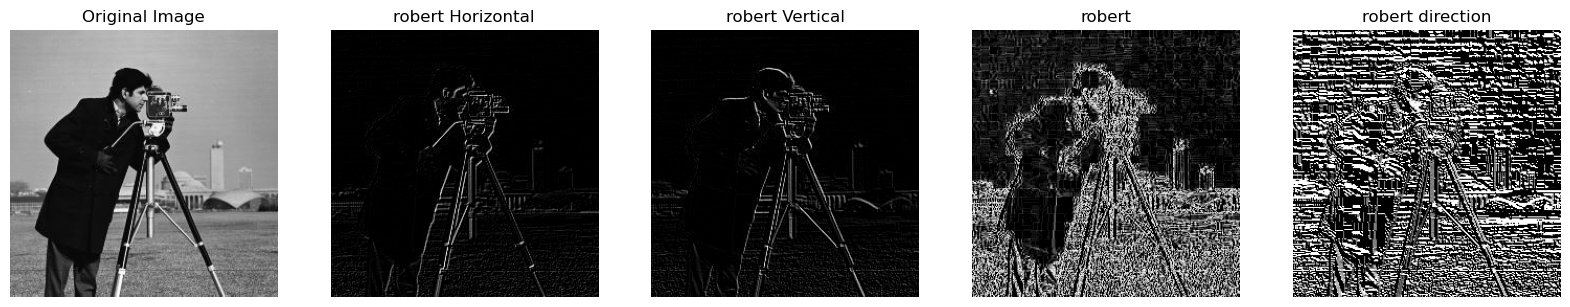

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

img=cv2.imread('cameraman.jpg',0)

robertx= np.array([[-1,0],[0,1]])
roberty = np.rot90(robertx)
#convoling the image using 3x3 kernal.robert horizontal and verticle to the input image to the image using the above kernal
robertx_con = cv2.filter2D(img, -1, robertx)
roberty_con = cv2.filter2D(img, -1, roberty)
magnitude_robert = np.sqrt(np.square(robertx_con) + np.square(roberty_con))
gradient_direction_robert = np.arctan2(roberty_con, robertx_con)

plt.figure(figsize=(20, 10))
plt.subplot(1,5,1)
plt.title('Original Image')
plt.imshow(img,cmap='gray')
plt.axis('off')
plt.subplot(1,5,2)
plt.title('robert Horizontal')
plt.imshow(robertx_con,cmap='gray')
plt.axis('off')
plt.subplot(1,5,3)
plt.title('robert Vertical')
plt.imshow(roberty_con,cmap='gray')
plt.axis('off')
plt.subplot(1,5,4)
plt.title('robert')
plt.imshow(magnitude_robert,cmap='gray')
plt.axis('off')
plt.subplot(1,5,5)
plt.title('robert direction')
plt.imshow(gradient_direction_robert,cmap='gray')
plt.axis('off')
plt.show()

(-0.5, 255.5, 255.5, -0.5)

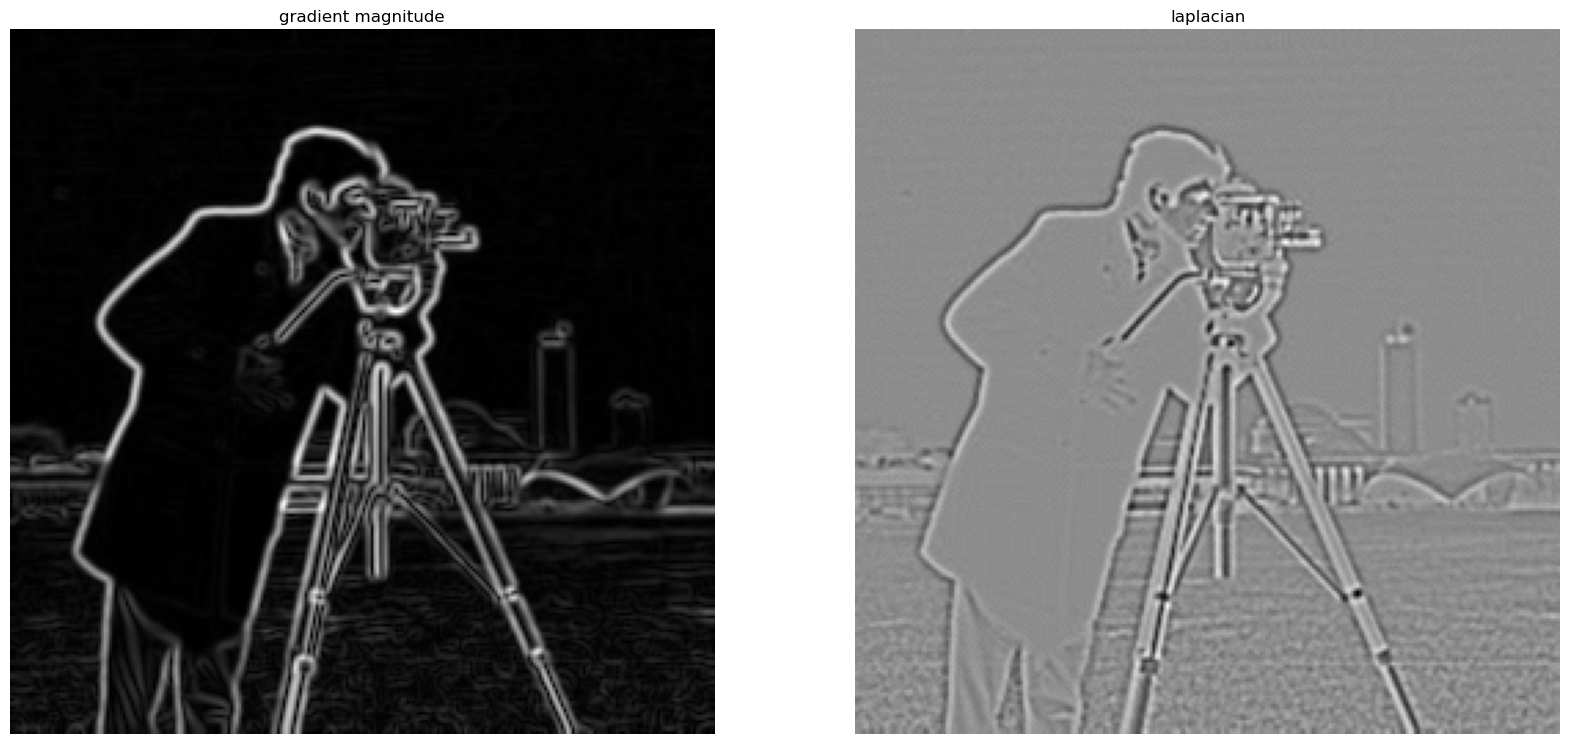

In [9]:
import cv2
import numpy as np

image = cv2.imread('cameraman.jpg', 0)
# gaussian
blurred = cv2.GaussianBlur(image, (5, 5), sigmaX=1)

sobel_x = cv2.Sobel(blurred, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(blurred, cv2.CV_64F, 0, 1, ksize=3)

gradient_magnitude = cv2.magnitude(sobel_x, sobel_y)
# laplacian
laplacian = cv2.Laplacian(blurred, cv2.CV_64F)



plt.figure(figsize=(20, 10))
plt.subplot(1,2,1)
plt.title('gradient magnitude')
plt.imshow(gradient_magnitude,cmap='gray')
plt.axis('off')
plt.subplot(1,2,2)
plt.title('laplacian')
plt.imshow(laplacian,cmap='gray')
plt.axis('off')


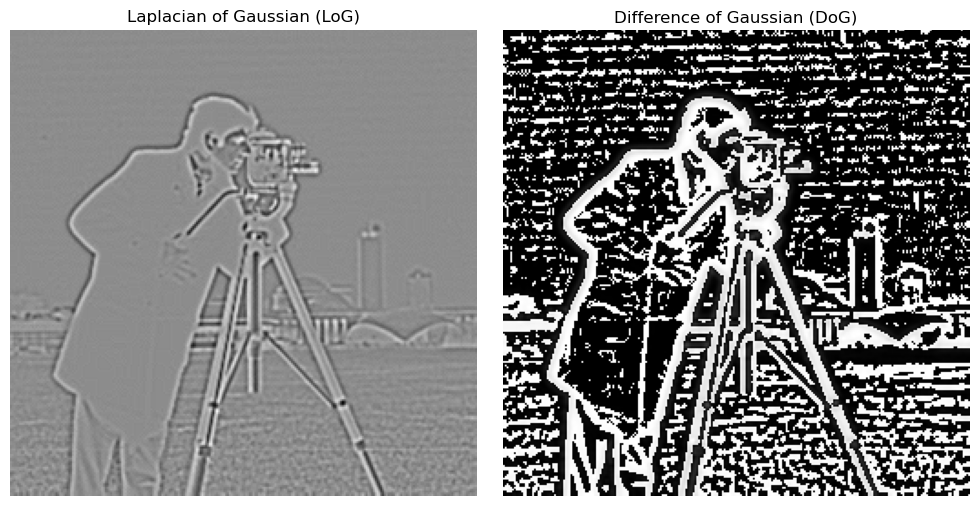

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('cameraman.jpg', 0)

def laplacian_of_gaussian(image, sigma):
    kernel_size = int(2 * np.ceil(2 * sigma) + 1)
    gaussian_blur = cv2.GaussianBlur(image, (kernel_size, kernel_size), sigma)
    # Apply Laplacian
    log = cv2.Laplacian(gaussian_blur, cv2.CV_64F)
    return log

sigma = 1.0
log_image = laplacian_of_gaussian(image, sigma)

def difference_of_gaussian(image, sigma1, sigma2):
    gaussian1 = cv2.GaussianBlur(image, (0, 0), sigma1)
    gaussian2 = cv2.GaussianBlur(image, (0, 0), sigma2)
    dog = gaussian1 - gaussian2
    return dog

sigma1 = 1.0
sigma2 = 2.0
dog_image = difference_of_gaussian(image, sigma1, sigma2)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Laplacian of Gaussian (LoG)')
plt.imshow(log_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Difference of Gaussian (DoG)')
plt.imshow(dog_image, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()




In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def roberts_operator(image):
    kernel_x = np.array([[1, 0], [0, -1]], dtype=np.float32)
    kernel_y = np.array([[0, 1], [-1, 0]], dtype=np.float32)
    grad_x = cv2.filter2D(image, cv2.CV_32F, kernel_x)
    grad_y = cv2.filter2D(image, cv2.CV_32F, kernel_y)
    gradient_magnitude = cv2.magnitude(grad_x, grad_y)
    return gradient_magnitude

def prewitt_operator(image):
    kernel_x = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]], dtype=np.float32)
    kernel_y = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]], dtype=np.float32)
    grad_x = cv2.filter2D(image, cv2.CV_32F, kernel_x)
    grad_y = cv2.filter2D(image, cv2.CV_32F, kernel_y)
    gradient_magnitude = cv2.magnitude(grad_x, grad_y)
    return gradient_magnitude

def sobel_operator(image):
    kernel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], dtype=np.float32)
    kernel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]], dtype=np.float32)
    grad_x = cv2.filter2D(image, cv2.CV_32F, kernel_x)
    grad_y = cv2.filter2D(image, cv2.CV_32F, kernel_y)
    gradient_magnitude = cv2.magnitude(grad_x, grad_y)
    return gradient_magnitude

def main(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    if image is None:
        print("Error: Image not found.")
        return
  
    mask_sizes = [3, 5, 7, 9]
    for size in mask_sizes:
        roberts_result = roberts_operator(image)
        prewitt_result = prewitt_operator(image)
        sobel_result = sobel_operator(image)

        display_results=(roberts_result, prewitt_result, sobel_result, size)

image_path = 'cameraman.jpg'  
main(image_path)

def display_results(roberts_result, prewitt_result, sobel_result, mask_size):
    plt.figure(figsize=(5, 5)) 

    plt.subplot(1, 3, 1)
    plt.imshow(roberts_result, cmap='gray')
    plt.title(f'Roberts {mask_size}x{mask_size}')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(prewitt_result, cmap='gray')
    plt.title(f'Prewitt {mask_size}x{mask_size}')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(sobel_result, cmap='gray')
    plt.title(f'Sobel {mask_size}x{mask_size}')
    plt.axis('off')

    plt.tight_layout()
    plt.show()




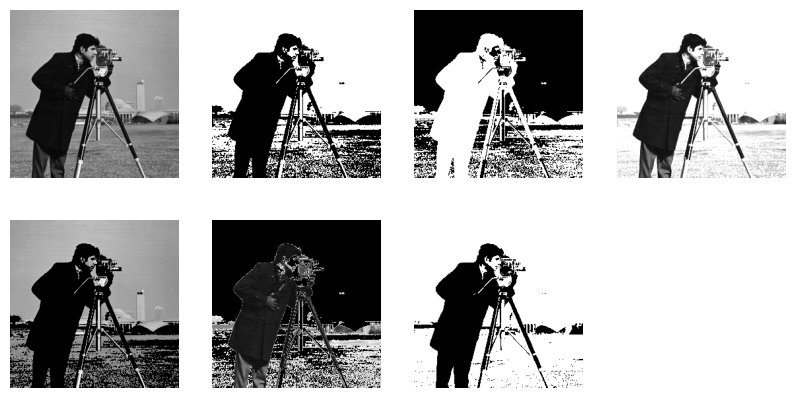

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img=cv2.imread('cameraman.jpg',0)
#histogram, bin_edges = np.histogram(img, bins=256, range=(0, 256))
# Plot the histogram
plt.figure(figsize=(10, 5))
#plt.bar(bin_edges[0:-1], histogram)  # bin_edges[0:-1] removes the last edge for correct plotting
#plt.title("Grayscale Image Histogram")
#plt.xlabel("Pixel Intensity")
#plt.ylabel("Frequency")
#plt.xlim([0, 255])
#plt.show()

#retval, thresholded_image = cv2.threshold(src, thresh, maxval, type)
retval, binary_image_1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY) # cv2.THRESH_BINARY: Pixels greater than thresh are set to maxval, else to 0.
retval, binary_image_2 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV) #cv2.THRESH_BINARY_INV: Inverse binary thresholding; pixels greater than thresh are set to 0, else to maxval.
retval, binary_image_3 = cv2.threshold(img, 127, 255, cv2.THRESH_TRUNC) #cv2.THRESH_TRUNC: Pixels greater than thresh are set to thresh, and pixels less than or equal remain unchanged.
retval, binary_image_4 = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO) #cv2.THRESH_TOZERO: Pixels greater than thresh are unchanged, and pixels less than or equal are set to 0.
retval, binary_image_5 = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO_INV) #cv2.THRESH_TOZERO_INV: Inverse of THRESH_TOZERO; pixels greater than thresh are set to 0, else unchanged
retval, binary_image_6 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU) #cv2.THRESH_OTSU: Computes an optimal threshold value using Otsu’s method, ignoring the thresh value passed in. Often used with cv2.THRESH_BINARY for optimal results.

plt.subplot(2,4,1)
plt.imshow(img,cmap='gray')
plt.axis("off")
plt.subplot(2,4,2)
plt.imshow(binary_image_1,cmap='gray')
plt.axis("off")
plt.subplot(2,4,3)
plt.imshow(binary_image_2,cmap='gray')
plt.axis("off")
plt.subplot(2,4,4)
plt.imshow(binary_image_3,cmap='gray')
plt.axis("off")
plt.subplot(2,4,5)
plt.imshow(binary_image_4,cmap='gray')
plt.axis("off")
plt.subplot(2,4,6)
plt.imshow(binary_image_5,cmap='gray')
plt.axis("off")
plt.subplot(2,4,7)
plt.imshow(binary_image_6,cmap='gray')
plt.axis("off")
plt.show()



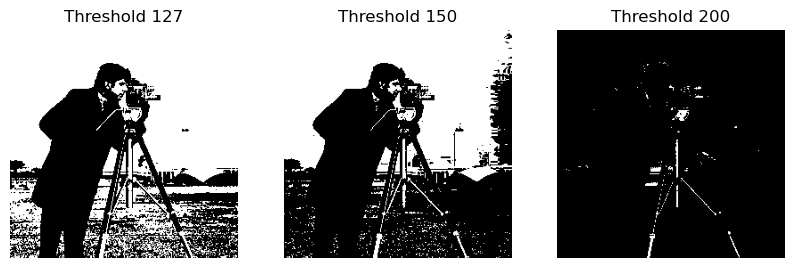

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('cameraman.jpg', cv2.IMREAD_GRAYSCALE)

_,thresh_127 = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
_,thresh_150 = cv2.threshold(image, 150, 255, cv2.THRESH_BINARY)
_,thresh_200 = cv2.threshold(image, 200, 255, cv2.THRESH_BINARY)

plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.title('Threshold 127')
plt.imshow(thresh_127, cmap='gray')
plt.axis("off")
plt.subplot(1, 3, 2)
plt.title('Threshold 150')
plt.imshow(thresh_150, cmap='gray')
plt.axis("off")
plt.subplot(1, 3, 3)
plt.title('Threshold 200')
plt.imshow(thresh_200, cmap='gray')
plt.axis("off")
plt.show()


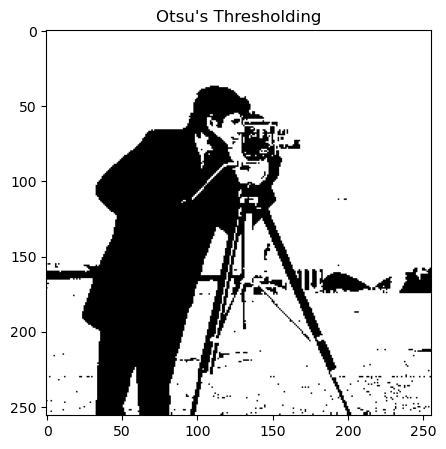

In [3]:
import cv2
import numpy as np
import matplotlib as pyplt


image = cv2.imread('cameraman.jpg', cv2.IMREAD_GRAYSCALE)

# Apply Otsu's thresholding
_, otsu_thresh = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

plt.figure(figsize=(5, 5))
plt.title("Otsu's Thresholding")
plt.imshow(otsu_thresh, cmap='gray')
plt.show()


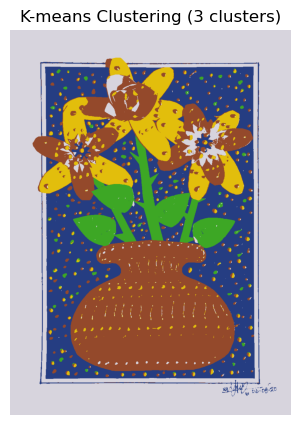

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('flower.jpg', cv2.IMREAD_COLOR)

if image is None:
    raise FileNotFoundError('Image not found. Please check the file path.')

image_reshaped = image.reshape((-1, 3))
image_reshaped = np.float32(image_reshaped)

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
k = 3
_, labels, centers = cv2.kmeans(image_reshaped, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

centers = np.uint8(centers)
segmented_image = centers[labels.flatten()]
segmented_image = segmented_image.reshape(image.shape)

plt.figure(figsize=(5, 5))
plt.title('K-means Clustering (3 clusters)')
plt.imshow(cv2.cvtColor(segmented_image, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()


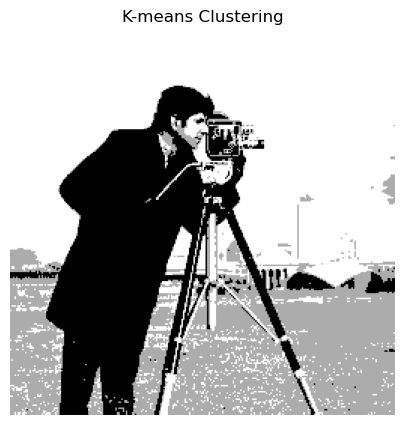

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('cameraman.jpg', cv2.IMREAD_GRAYSCALE)

if image is None:
    raise FileNotFoundError('Image not found. Please check the file path.')

image_reshaped = image.reshape((-1, 1))
image_reshaped = np.float32(image_reshaped)

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
k = 3
_, labels, centers = cv2.kmeans(image_reshaped, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

centers = np.uint8(centers)
segmented_image = centers[labels.flatten()]
segmented_image = segmented_image.reshape(image.shape)

plt.figure(figsize=(5, 5))
plt.title('K-means Clustering')
plt.imshow(segmented_image, cmap='gray')
plt.axis("off")
plt.show()


Note: you may need to restart the kernel to use updated packages.
     ---------------------------------------- 0.0/87.2 kB ? eta -:--:--
     ---- ----------------------------------- 10.2/87.2 kB ? eta -:--:--
     ---- ----------------------------------- 10.2/87.2 kB ? eta -:--:--
     ----------------- -------------------- 41.0/87.2 kB 393.8 kB/s eta 0:00:01
     -------------------------------------- 87.2/87.2 kB 493.3 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/203.0 MB ? eta -:--:--
   ---------------------------------------- 0.2/203.0 MB 3.5 MB/s eta 0:00:59
   ---------------------------------------- 0.2/203.0 MB 2.5 MB/s eta 0:01:22
   ---------------------------------------- 0.3/203.0 MB 1.7 MB/s eta 0:02:02
   ---------------------------------------- 0.7/203.0 MB 3.9 MB/s eta 0:00:52
   ---------------------------------------- 0.7/203.0 MB 3.9 MB/s eta 0